Autor: Martín de las Heras

# Práctica 2

En primer lugar, importamos las librerías que vamos a utilizar.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

A continuación, leemos el fichero .csv que queremos procesar.

In [8]:
datos = pd.read_csv('data_power_ree_bad_data.csv', index_col='Date', sep=';')
datos.head()

,Demanda prevista,Demanda programada,Demanda real,Generación medida total,Generación medida Biogás,Generación medida Biomasa,Generación medida Carbón,Generación medida Ciclo combinado,Generación medida cogeneración,Generación medida Consumo bombeo,...,Generación medida Gas Natural Cogeneración,Generación medida Hidráulica,Generación medida Nuclear,Generación medida solar,Generación medida Solar fotovoltaica,Generación medida Solar térmica,Mes,Temperatura media,Precipitaciones,PIB
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31T23:00:00.000+01:00,154752.0,156834.0,156790.0,27678.083,92.284,465.385,238.098,2641.549,2365.715,-2.073,...,2281.081,7081.197,7124.133,195.0,195.0,NaN,2020-12-,NaN,NaN,NaN
2021-01-01T00:00:00.000+01:00,148241.0,147474.0,148337.0,25739.347,92.908,467.897,239.196,2463.653,2304.289,-2.032,...,2227.381,5844.110,7123.469,169.0,169.0,NaN,2021-01-,5.1,74.0,288.651
2021-01-01T01:00:00.000+01:00,141439.0,139902.0,141429.0,25392.256,91.740,460.432,238.417,2471.566,2299.577,-2.083,...,2223.321,5416.007,7123.731,215.0,215.0,NaN,2021-01-,5.1,74.0,288.651
2021-01-01T02:00:00.000+01:00,128992.0,128736.0,128946.0,24087.680,90.350,467.257,236.848,2036.932,2292.195,-37.282,...,2216.180,4513.413,7122.127,243.0,243.0,NaN,2021-01-,5.1,74.0,288.651
2021-01-01T03:00:00.000+01:00,118274.0,117792.0,118255.0,22824.842,90.950,463.283,236.162,1711.188,2283.986,-828.407,...,2207.916,3703.586,7122.762,253.0,253.0,NaN,2021-01-,5.1,74.0,288.651


Detectamos entonces dónde están los *missing values* de la tabla.

In [9]:
datos.isna().sum()

Demanda prevista                                        0
Demanda programada                                      0
Demanda real                                          694
Generación medida total                               721
Generación medida Biogás                              721
Generación medida Biomasa                             721
Generación medida Carbón                              721
Generación medida Ciclo combinado                     721
Generación medida cogeneración                        721
Generación medida Consumo bombeo                      721
Generación medida Derivados del petróleo ó carbón     721
Generación medida Energía residual                   3232
Generación medida Eólica                              721
Generación medida Eólica terrestre                    721
Generación medida Gas Natural Cogeneración            721
Generación medida Hidráulica                          721
Generación medida Nuclear                             721
Generación med

En primer lugar, cambiamos el formato de la fecha de *string* a *datetime*.

In [10]:
datos.index = pd.to_datetime(datos.index, utc=True)
datos.index

DatetimeIndex(['2020-12-31 22:00:00+00:00', '2020-12-31 23:00:00+00:00',
               '2021-01-01 00:00:00+00:00', '2021-01-01 01:00:00+00:00',
               '2021-01-01 02:00:00+00:00', '2021-01-01 03:00:00+00:00',
               '2021-01-01 04:00:00+00:00', '2021-01-01 05:00:00+00:00',
               '2021-01-01 06:00:00+00:00', '2021-01-01 07:00:00+00:00',
               ...
               '2023-08-30 13:00:00+00:00', '2023-08-30 14:00:00+00:00',
               '2023-08-30 15:00:00+00:00', '2023-08-30 16:00:00+00:00',
               '2023-08-30 17:00:00+00:00', '2023-08-30 18:00:00+00:00',
               '2023-08-30 19:00:00+00:00', '2023-08-30 20:00:00+00:00',
               '2023-08-30 21:00:00+00:00', '2023-08-30 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=23332, freq=None)

Para poder visualizar mejor los datos que nos faltan, los representamos en una gráfica:

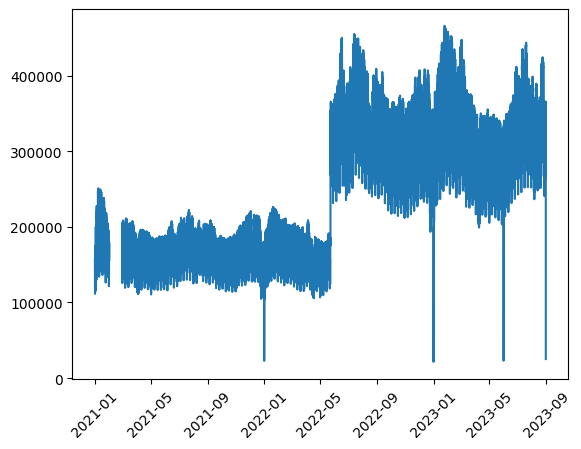

In [11]:
#datos[datos['Demanda real'].isnull()]
plt.xticks(rotation=45)
plt.plot(datos['Demanda real']);

En esta gráfica podemos ver que en torno a febrero 2021, tenemos un periodo de tiempo en el que no tenemos datos disponibles, así como un salto del consumo a mitad de año en 2022.

Pero primero, sacamos los días en los que el consumo es anormalmente bajo, con una cota de 75000 valdrá para extraerlos:

In [12]:
datos[datos['Demanda real'] < 75000]

,Demanda prevista,Demanda programada,Demanda real,Generación medida total,Generación medida Biogás,Generación medida Biomasa,Generación medida Carbón,Generación medida Ciclo combinado,Generación medida cogeneración,Generación medida Consumo bombeo,...,Generación medida Gas Natural Cogeneración,Generación medida Hidráulica,Generación medida Nuclear,Generación medida solar,Generación medida Solar fotovoltaica,Generación medida Solar térmica,Mes,Temperatura media,Precipitaciones,PIB
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-31 22:00:00+00:00,22737.0,21883.0,22755.0,20388.915,95.115,484.799,1067.390,1718.594,1872.360,-610.673,...,1686.893,2677.792,6100.404,10.662,585.00,10.077,2021-12-,8.5,62.0,319.346
2022-12-31 22:00:00+00:00,21314.0,21161.0,21460.0,18560.847,81.797,156.459,226.195,2133.890,742.471,-2330.131,...,680.006,2756.648,6446.205,142.000,142.00,NaN,2022-12-,9.5,115.5,354.771
2023-05-31 22:00:00+00:00,23163.0,22886.0,22952.0,22624.010,84.542,370.264,461.004,7578.515,2521.824,-66.891,...,2434.000,3925.711,5061.897,490.347,0.31,490.037,2023-06-,21.1,67.2,354.313
2023-08-30 22:00:00+00:00,25530.0,25406.0,25109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-,NaN,NaN,NaN


A continuación, sacamos la fecha en la que se puede partir el conjunto de datos en dos series temporales:

En primer lugar calculamos una columna nueva con la diferencia entre la demanda real y la media de las demandas reales en torno a ella. Esta nueva columna la representamos en un gráfico y vemos el outlier hacia arriba:

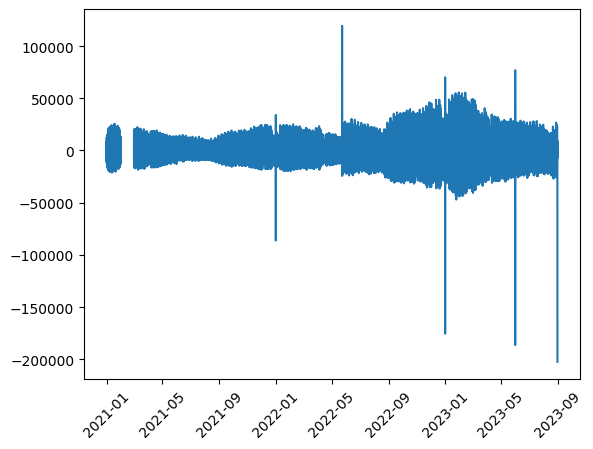

In [13]:
window=3
mean = datos['Demanda real'].rolling(window).mean()

datos['tmp'] = datos['Demanda real'] - mean

plt.xticks(rotation=45)
plt.plot(datos['tmp']);

Vemos entonces que el único valor de más de **100000** es el que nos interesa, por lo que lo sacamos.

In [14]:
datos[datos['tmp'] > 100000]

,Demanda prevista,Demanda programada,Demanda real,Generación medida total,Generación medida Biogás,Generación medida Biomasa,Generación medida Carbón,Generación medida Ciclo combinado,Generación medida cogeneración,Generación medida Consumo bombeo,...,Generación medida Hidráulica,Generación medida Nuclear,Generación medida solar,Generación medida Solar fotovoltaica,Generación medida Solar térmica,Mes,Temperatura media,Precipitaciones,PIB,tmp
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-23 19:00:00+00:00,357027.0,354795.0,354154.0,27797.591,97.767,428.322,756.361,4650.434,2714.574,-2.048,...,4356.204,5040.793,764.003,80.302,683.701,2022-05-,18.1,20.9,318.444,119366.666667


Una vez tenemos la fecha, la guardamos y eliminamos la columna.

In [15]:
fecha_corte = datos[datos['tmp'] > 100000].index[0]
datos.drop('tmp', axis=1, inplace=True)

Tras esto, nos dividimos la serie en las dos series temporales que vamos a tratar.

In [16]:
serie_temporal_1 = datos[datos.index < fecha_corte]
serie_temporal_2 = datos[datos.index >= fecha_corte]

A continuación sacamos los gráficos de autocorrelación.

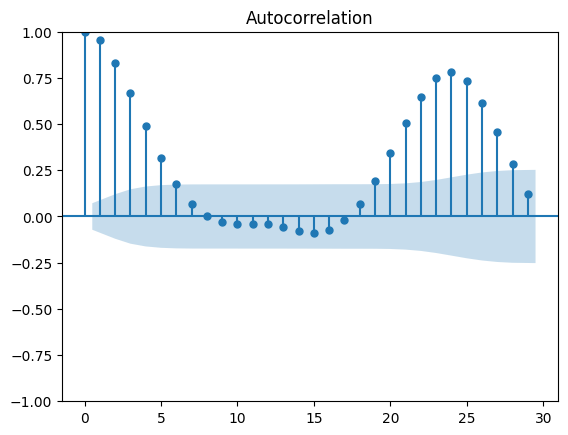

In [17]:
fecha_inicio = serie_temporal_1[serie_temporal_1['Demanda real'].isnull()].index[0]
fecha_fin = serie_temporal_1[serie_temporal_1['Demanda real'].isnull()].index[-1]
serie_temporal_0 = serie_temporal_1[serie_temporal_1.index < fecha_inicio]
plot_acf(serie_temporal_0['Demanda real'], missing='drop', alpha=.05);

Vemos entonces que tenemos que realizar una ARIMA para poder predecir los valores del mes vacío. Para ello tenemos que sacar los diferentes parámetros de la función. Empezamos con **d**:

3


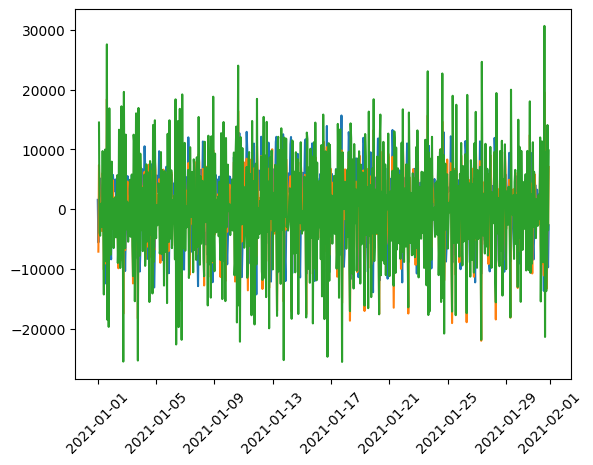

In [18]:
serie_temporal_0_diff = serie_temporal_0['Demanda real'].diff().dropna()
d=0
d = d+1
serie_temporal_0_diff = serie_temporal_0_diff.diff().dropna()
plt.plot(serie_temporal_0_diff)
d = d+1
serie_temporal_0_diff = serie_temporal_0_diff.diff().dropna()
plt.plot(serie_temporal_0_diff)
d = d+1
serie_temporal_0_diff = serie_temporal_0_diff.diff().dropna()

plt.xticks(rotation=45)
plt.plot(serie_temporal_0_diff)
print(d)

Proseguimos con **p**: para ello sacamos la gráfica de autocorrelación de los valores de la demanda real agrupados por día.

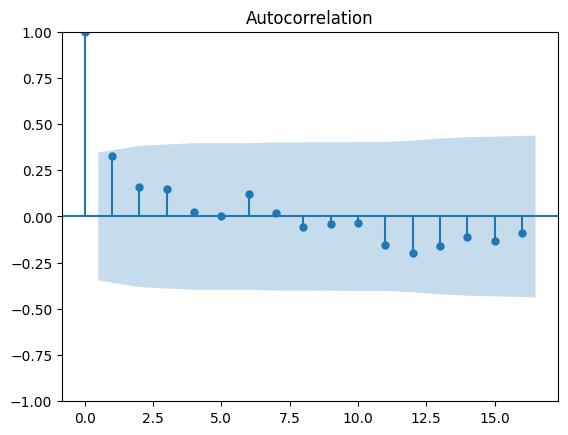

In [19]:
serie_temporal_0_daily = serie_temporal_0.resample('D').sum()
plot_acf(serie_temporal_0_daily['Demanda real'], alpha=.05);

Por lo tanto tenemos que **p**=1.

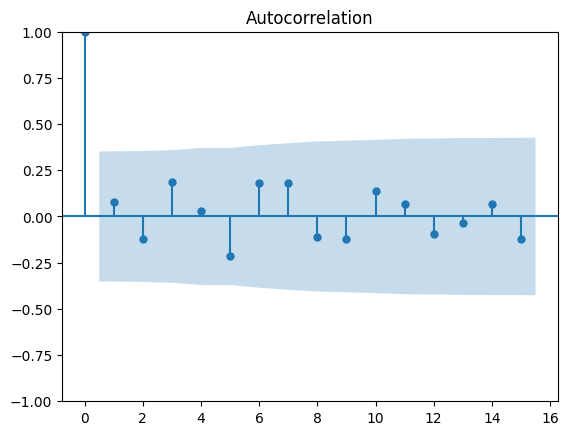

In [20]:
plot_acf(serie_temporal_0_daily['Demanda real'].diff().dropna(), alpha=0.05);

Vemos que **q**=1, por lo que ya tenemos los tres parámetros para hacer la predicción con la ARIMA:

C:\Users\Marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


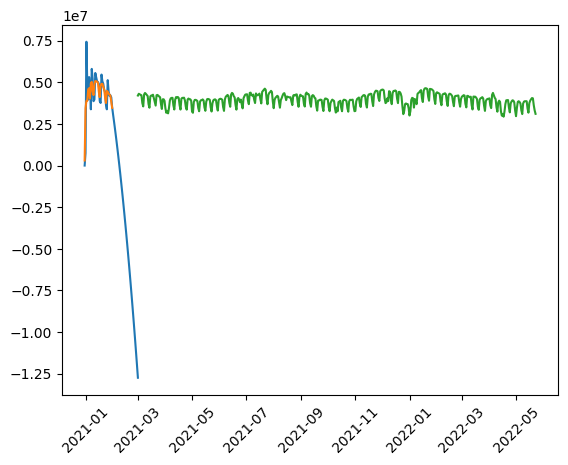

In [21]:
modelo = ARIMA(serie_temporal_0_daily['Demanda real'], order=(1,d,1))
res = modelo.fit()
plt.plot(res.predict(start=serie_temporal_0_daily.index[0], end=fecha_fin))
plt.plot(serie_temporal_0_daily['Demanda real'])
serie_temporal_1_daily = serie_temporal_1.resample('D').sum()
plt.xticks(rotation=45)
plt.plot(serie_temporal_1_daily[serie_temporal_1_daily.index>fecha_fin]['Demanda real']);

A partir de aquí no es necesario hacer nada. Pero para seguir, podemos calcular la media horaria en función del día de la semana y reemplazar los valores vacíos con esos.

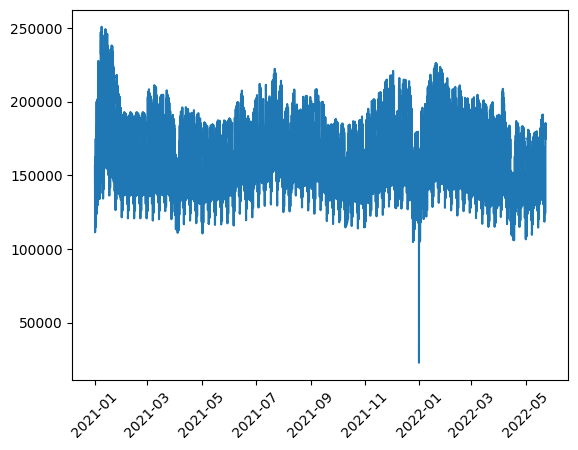

In [22]:
serie_temporal_1_post_fin = serie_temporal_1[serie_temporal_1.index > fecha_fin]
medias_weekday = serie_temporal_1_post_fin.groupby(by=[serie_temporal_1_post_fin.index.weekday, serie_temporal_1_post_fin.index.hour])['Demanda real'].mean()
start = len(serie_temporal_0)
end = len(serie_temporal_1[(serie_temporal_1.index < fecha_fin)])
for i in range(start, end):
    serie_temporal_1.iloc[i, 2] = medias_weekday[serie_temporal_1.index[i].weekday(), serie_temporal_1.index[i].hour]

plt.xticks(rotation=45)
plt.plot(serie_temporal_1['Demanda real']);